# 9.2 Hypothesis Testing Two Population Variances

## The $F$-Distribution

We can compare two independent $\chi^2$-distributed random variables by considering a fraction involving the two random variables. This fraction is a new random variable, and we say that it has an $F$-distribution. The shape of an $F$-distribution is determined by the degrees of freedom of the $\chi^2$-distribution of the numerator $df_1$ and the degrees of freedom of the $\chi^2$-distribution of the denominator $df_2$.

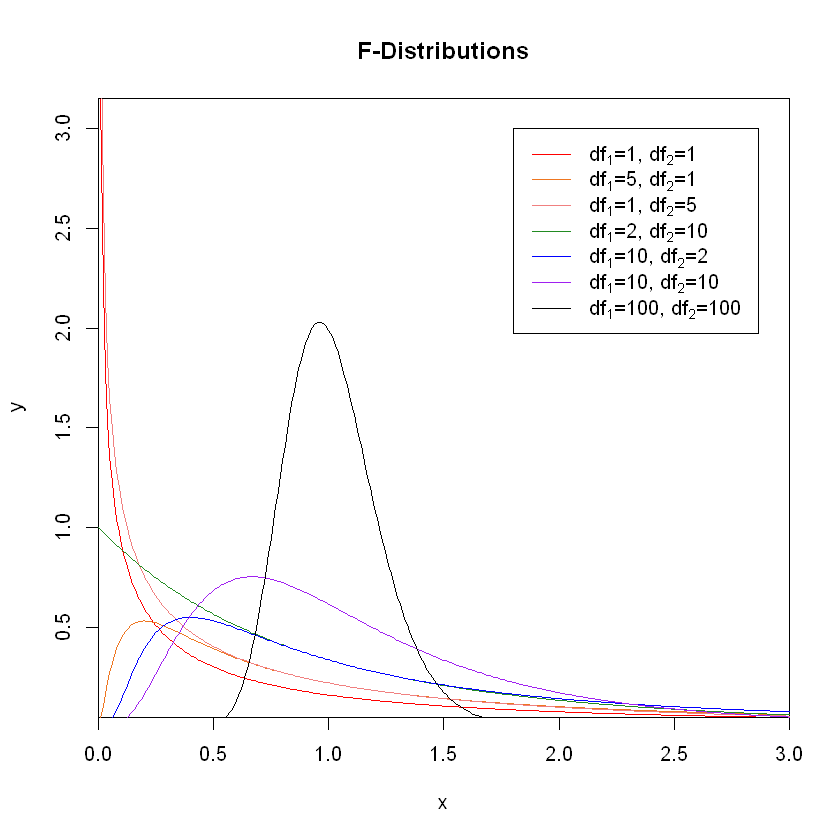

In [1]:
#**ALT=Graphs of F-distributions with various numerator and denominator degrees of freedoms.**#
#**HIDE_INPUT**#
color <- c("red", "chocolate2", "lightcoral","forestgreen", "blue", "purple", "black")

df1list <- c(2, 5, 50)
df2list <- c(2, 5, 50)

x <- seq(0, 3, 0.01)
df <- c(1,1, 5,1, 1,5, 2,10, 10,2, 10,10, 100,100)

dfidx <- 1
y <- df(x, df[dfidx], df[dfidx + 1])
colidx <- 1
plot(x, y, type="l", col = color[colidx], main = "F-Distributions", xaxs = "i", yaxs = "i")
legtxt <- as.expression(bquote("df"[1]*"="*.(df[dfidx])*", df"[2]*"="*.(df[dfidx+1])))

while (colidx < length(color)) {
    dfidx <- dfidx + 2
    y <- df(x, df[dfidx], df[dfidx + 1])
    colidx <- colidx + 1
    lines(x, y, col = color[colidx])
    legtxt <- c(legtxt, as.expression(bquote("df"[1]*"="*.(df[dfidx])*", df"[2]*"="*.(df[dfidx+1]))))
}

legend(1.8, 3, legend=legtxt, col=color, lty=1)


To find the probability to the left or right of a value when using the $F$-distribution, we will use the R function

```R
pf(q, df1, df2, lower.tail)
```

where we want the probability to the left or right of <code>q</code>, the numerator degrees of freedom is <code>df1</code>, the denominator degrees of freedom is <code>df2</code>, and <code>lower.tail</code> is set to either <code>TRUE</code> or <code>FALSE</code> depending on whether we want to calculate the probability to the left or right of the value.


## Testing Two Population Variances

You may recall that we use a $\chi^2$-distribution when performing a hypothesis test on the variance of a population. When comparing two population variances, we have one $\chi^2$-distribution for each of the two population, so we compare the population variances using an $F$-distribution. When the populations are independent from each other and normally distributed, the test statistic for the hypothesis test is given by

$$ F = \frac{s_1^2}{s_2^2}, $$

where $s_1$ is the sample standard deviation of the sample from population 1, and $s_2$ is the sample standard deviation of the sample from population 2. If the size of sample 1 is $n_1$ and the size of sample 2 is $n_2$, then the numerator degrees of freedom is $df_1 = n_1 - 1$ and the denominator degrees of freedom is $df_2 = n_2 - 1$.

The general steps for completing a hypothesis test have not changed:
1. State the null and alternative hypotheses.
2. Assuming the null hypothesis is true, determine the features of the distribution of test statistics.
3. Find the $p$-value of the test statistic.
4. Make a conclusion about the null hypothesis.

Some examples should clarify this process.

***

### Example 2.1

A researcher believes that there is less variance in the heights of 10 year-old males compared to adult males. She measures the heights of 22 10-year-old males and 27 adult males with the following results (in centimeters):

15 Year-Old Males (Sample A):

    148.8, 141.4, 144.9, 140.2, 140.7, 139.6, 148.5, 136.9, 147.5, 148.5, 131.8, 127.9, 132.2, 138.6, 148.5, 141.1, 130.9, 139.2, 137.5, 151.9, 135, 142.6

Adult Males (Sample B):

    168.8, 186.4, 172.1, 180.1, 163.7, 185.2, 173.2, 174, 165.9, 169.2, 175.7, 181.3, 172.7, 172.1, 168.3, 171.8, 195, 186.4, 179, 168.3, 171.3, 182.9, 164.4, 169, 186.8, 178.3, 191.1

Conduct a hypothesis test with a 7% level of significance to test her claim.

#### Solution
##### Step 1: State the null and alternative hypotheses.
We are given that one of the hypotheses is that the heights of 10 year-old males has a smaller variance than the heights of adult males. Written mathematically, this means that one of our hypotheses is that $\sigma_A^2 < \sigma_B^2$. We can rewrite this in a form that is easier to test by dividing both sides by $\sigma_B^2$ to get
$$\frac{\sigma_A^2}{\sigma_B^2} < 1.$$ 
Since this inequality uses the less-than symbol, this is the alternative hypothesis. Using the opposite symbol for the null hypothesis, we obtain our hypotheses:
$$\begin{align}
H_0:& \frac{\sigma_A^2}{\sigma_B^2} \geq 1, \\
H_a:& \frac{\sigma_A^2}{\sigma_B^2} < 1.
\end{align}$$
Note that because $H_a$ uses a less-than symbol, we will be performing a left-tailed test.

##### Step 2: Assuming the null hypothesis is true, determine the features of the distribution of test statistics.
Since we are testing two population variances, we will use an $F$-distribution. The numerator degrees of freedom is $df_A = 22 - 1 = 21$ and the denominator degrees of freedom is $df_B = 26$.

##### Step 3: Find the $p$-value of the test statistic.
Our test statistic is $F = \frac{s_A^2}{s_B^2}$, which means we first need to find the standard deviation $s_A$ of sample A and the standard deviation $s_B$ of sample B. Let's start by finding $s_A$.

In [9]:
xA <- c(148.8, 141.4, 144.9, 140.2, 140.7, 139.6, 148.5, 136.9, 147.5, 148.5, 131.8, 127.9, 132.2, 138.6, 148.5, 141.1, 130.9, 139.2, 137.5, 151.9, 135, 142.6)
nA <- length(xA)

xbarA <- sum(xA)/nA

sA <- sqrt( sum( (xA - xbarA)^2 )/(nA - 1) )
sA

[1] 6.612667

So the standard deviation of sample A is $s_A = 6.613$. The process is the same to find $s_B$.

In [10]:
xB <- c(168.8, 186.4, 172.1, 180.1, 163.7, 185.2, 173.2, 174, 165.9, 169.2, 175.7, 181.3, 172.7, 172.1, 168.3, 171.8, 195, 186.4, 179, 168.3, 171.3, 182.9, 164.4, 169, 186.8, 178.3, 191.1)
nB <- length(xB)

xbarB <- sum(xB)/nB

sB <- sqrt( sum( (xB - xbarB)^2 )/(nB - 1) )
sB

[1] 8.45773

The standard deviation of sample B is $s_B = 8.458$.

We can now calculate our test statistic.

In [11]:
F <- sA^2/sB^2
F

[1] 0.6112877

Our test statistic is
$$ F = \frac{s_A^2}{s_B^2} = \frac{6.613^2}{8.458^2} = 0.611. $$

We are now prepared to calculate the $p$-value using the numerator degrees of freedom and denominator degrees of freedom we calculated in step 2.

In [12]:
pf(q = F, df1 = 21, df2 = 26, lower.tail = TRUE)

[1] 0.1264851

So the $p$-value is $P(F < 0.611) = 0.126$. In other words, assuming the null hypothesis is true, there is a 12.6% chance of the variance from a sample from population A being at least as small as the variance we actually obtained relative to the variance from a sample from population B.

##### Step 4: Make a conclusion about the null hypothesis.
Since $p$-value $= 0.126 \geq 0.07 = \alpha$, we do *not* reject the null hypothesis. There is not enough evidence to conclude that the variance of heights of 10 year-old males is lower than the variance of heights of adult males.

***

### Example 2.2

In [ ]:
#**VID=5Us1OtgWjEA**#